In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [8]:
image_path = '../output_videos/cropped_player.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2BGR)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\demosaicing.cpp:1721: error: (-215:Assertion failed) scn == 1 && (dcn == 3 || dcn == 4) in function 'cv::demosaicing'


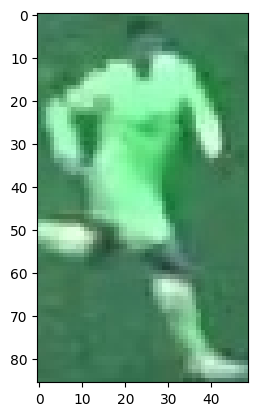

In [9]:
plt.imshow(image)
plt.show()

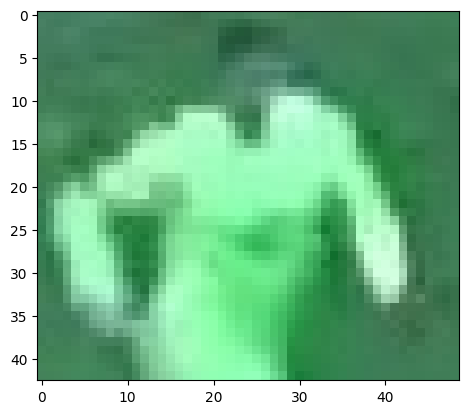

In [10]:
# Take the top half of the image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

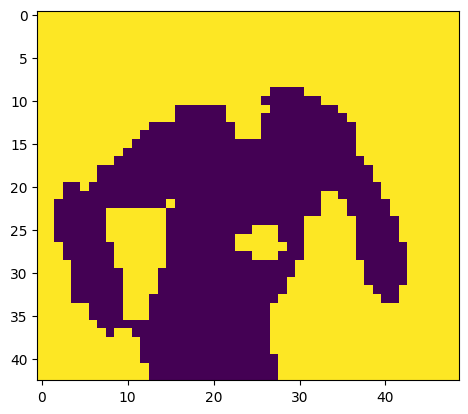

In [12]:
# Cluster colors into two
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get cluster labels
labels = kmeans.labels_

# Reshape the labels into original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display clustered image
plt.imshow(clustered_image)
plt.show()

In [13]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1, 0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [14]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([142.74473684, 235.21052632, 171.08026316])